In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

In [2]:
inv = pd.read_csv('201901_inversion_extranjera.csv',encoding = 'iso-8859-1',
                  delimiter = ';', thousands = '.', decimal = ',')
inv.set_index('Comunidad', inplace=True)
inv

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Comunidad,,,,,,,,,,,,,,,,,,,
MADRID,19219689.48,6870285.19,6074756.95,6308866.66,3611497.86,3955826.57,4145318.99,23067334.41,23940611.78,8401282.80,4543611.13,17482671.90,9383770.62,8875958.06,11148877.12,10966045.53,11540061.87,17672455.60,29830225.64
Todas,26080463.39,15537035.55,11630185.07,9913625.66,10182542.04,13907154.10,9874532.99,30208525.79,30195709.99,12772638.47,12452718.63,28790849.06,14730006.91,17278129.46,20629267.09,24802029.58,26125196.04,27185032.85,34897277.45
CATALUNA,2678070.50,3322071.33,2141851.17,1320941.94,1597554.31,2258923.81,2667556.54,2639652.31,2982331.94,1577043.12,4890273.20,3130809.96,2707057.91,3672640.02,3064200.70,5492823.67,8273955.72,3272812.71,1846152.84


In [3]:
# Transponer la tabla
inv1 = inv.T
inv1['resto'] = inv1['Todas']- inv1['MADRID'] - inv1['CATALUNA']
inv1.head()

Comunidad,MADRID,Todas,CATALUNA,resto
2000,19219689.48,26080463.39,2678070.50,4182703.41
2001,6870285.19,15537035.55,3322071.33,5344679.03
2002,6074756.95,11630185.07,2141851.17,3413576.95
2003,6308866.66,9913625.66,1320941.94,2283817.06
2004,3611497.86,10182542.04,1597554.31,4973489.87


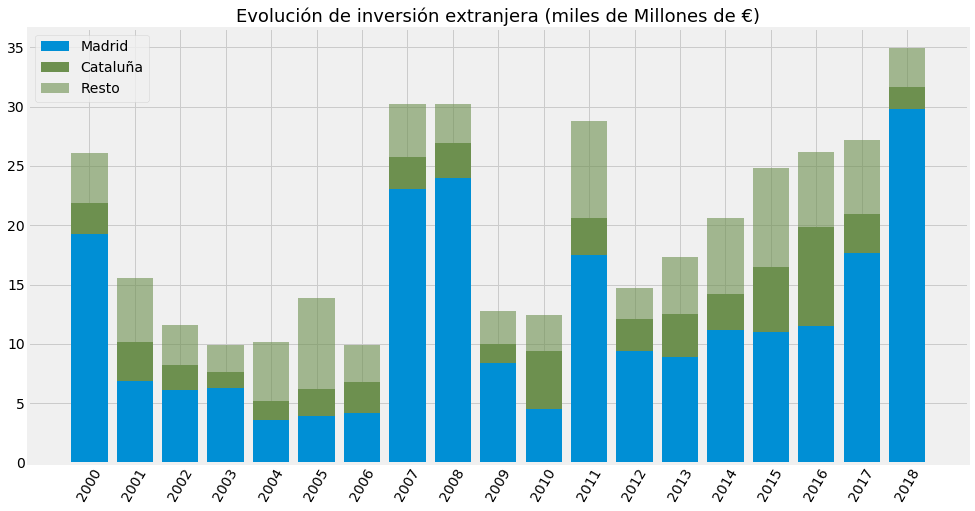

In [38]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

x = inv1.index
plt.bar(x, inv1['MADRID']/1e6, alpha=1, color=sns.color_palette()[0], label='Madrid')
plt.bar(x, inv1['CATALUNA']/1e6, alpha=1, color=sns.color_palette()[3], label='Cataluña', 
        bottom = inv1['MADRID']/1e6)
plt.bar(x, inv1['resto']/1e6, alpha=0.6, color=sns.color_palette()[3], label='Resto', 
        bottom = inv1['MADRID']/1e6 + inv1['CATALUNA']/1e6 )


plt.xticks(x,rotation = 60)
plt.legend()
plt.title('Evolución de inversión extranjera (miles de Millones de €)',fontsize= 18)
plt.savefig('images/inversion_extranjera.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

In [39]:
# % de inversión recibida por comunidad
inv1['madrid%']= inv1['MADRID']/inv1['Todas']*100
inv1['cat%']= inv1['CATALUNA']/inv1['Todas']*100

# Inversion media desde 2000 en %
inv_media_mad = inv1['MADRID'].sum()/inv1['Todas'].sum()*100
inv_media_cat = inv1['CATALUNA'].sum()/inv1['Todas'].sum()*100

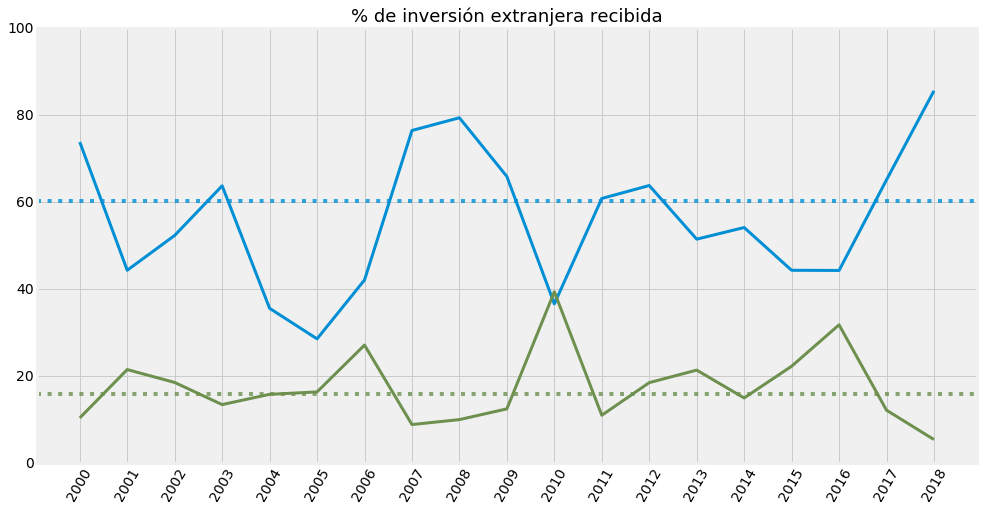

In [41]:
# Curvas de Madrid
plt.plot(x, inv1['madrid%'],lw=3, ls='-', alpha=1, color=sns.color_palette()[0],label='Madrid')
plt.axhline(y = inv_media_mad , ls=':', alpha=0.8, color=sns.color_palette()[0])

# Curvas de Cataluña
plt.plot(x, inv1['cat%'],lw=3, ls='-', alpha=1, color=sns.color_palette()[3], label='Cataluña')
plt.axhline(y = inv_media_cat , ls=':', alpha=0.8, color=sns.color_palette()[3])

plt.xticks(x,rotation = 60)
plt.axis(ymin= 0 , ymax=100)

plt.title('% de inversión extranjera recibida',fontsize= 18)
plt.savefig('images/inversion_extranjera_porcentaje.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()